# Load Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
#sns.set(style='whitegrid', context='notebook')

## Linear regression vs Logistic regression untuk klasifikasi

Apakah klasifikasi dapat dilakukan menggunakan linear regresion? 

Sebagai contoh, dataset `default` (mampu/gagal bayar hutang) memiliki dua kelas:

$$
Y=\left\{\begin{array}{ll}
0 & \text { if No } \\
1 & \text { if Yes. }
\end{array}\right.
$$

Apakah kita bisa membuat model klasifikasi dengan regresi linear dari $Y$ dengan input $X$ dan mengklasifikasikan $Yes$ saat $\hat{Y} > 0.5$?

- Dalam kasus binary classification seperti data `default`, linear regression bisa saja digunakan.
- Populasi dari $E(Y|X=x) = Pr(Y=1|X=x)$, sehingga regresi linear dapat digunakan untuk kasus ini.
- Kelemahan dalam penggunaan linear regression untuk kasus ini adalah, nilai probabilitas yang di keluarkan oleh linear regression dapat bernilai lebih kecil dari 0 dan lebih besar dari 1. 
- Penggunaan linear regression untuk kasus ini juga sangat sensitif terhadap outliers, dengan satu outlier saja garis pisahya bisa berubah drastis. Hal ini dapat di-illustrasikan sebagai berikut:

<img src="https://i.stack.imgur.com/VVtRW.png" width= 300px;/>

<img src="https://i.stack.imgur.com/nEC4H.png" width= 500px;/>





Sekarang mari kita lihat visualisasi dari Linear regresion vs Logistik regresion untuk kasus ini. Disini kita hanya menggunakan variabel `balance` dari dataset `default` sebagai input $X$ kita. 

### linear regression vs logistic regression visualization

Code berikut diadopsi dari https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%204.ipynb

Kita memerlukan library `openpyxl` untuk membaca file excel

In [2]:
# install library openpyxl
!pip install openpyxl

In [3]:
# load dataset 'default'
defaultdata = pd.read_excel("https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Default.xlsx?raw=true")
# lihat 5 data pertama
defaultdata.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


### visualisasi perbandingan linear dan logistic regression

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


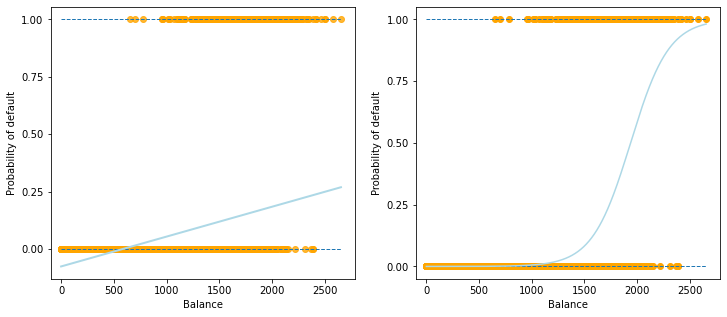

In [4]:
from sklearn.linear_model import LogisticRegression

defaultdata['default2'] = defaultdata.default.factorize()[0]
X_train = defaultdata.balance.values.reshape(-1,1) 
y = defaultdata.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(defaultdata.balance.min(), defaultdata.balance.max()).reshape(-1,1)

clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(defaultdata.balance, defaultdata.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

Titik oranye menunjukan output $Y$ dari data kita yang bernilai 1 atau 0. 

Linear regresion tidak dapat mengestimasi $Pr(Y=1|X)$ dengan baik dibandingkan dengan Logistic regression!

---

Jika kita memodelkan hubungan $X$ dengan $p(X)$ menggunakan regressi linear dengan bentuk $p(X)=w_{0}+w_{1} X $, kita akan mendapatkan garis pisah seperti pada visualisasi diatas sebelah kiri. 

Kita dapat melihat beberapa masalah yang muncul dengan pemodelan relasi dengan cara seperti ini:

- Jika balance $X$ kita mendekati $0$ maka nilai $p(X)$ kita negatif.
- Jika balance $X$ kita besar maka nilai $p(X)$ kita dapat bernilai lebih dari 1.

Mengapa hal ini menjadi masalah?
Ingat kembali salah satu sifat probabilitas: 

$$
0 \leq P(A) \leq 1
$$ 

Masalah ini dapat terjadi tidak hanya pada data `default` saja. Tiap data dengan output binary $\{0,1\}$, jika dimodelkan dengan regresi linear seperti diatas, prediksinya dapat bernilai $p(X)<0$ dan $p(X)>1$ kecuali jika input $X$ berada dalam domain tertentu.

---



Kita dapat mengatasi hal ini dengan memodelkan $p(X)$ dengan nilai output $[0,1]$

Banyak macam fungsi memiliki sifat ini, pada model logistic regression kita akan menggunakan fungsi sigmoid dengan bentuk:

$$
\begin{align}
p(X)&=\frac{e^{w_{0}+w_{1} X}}{1+e^{w_{0}+w_{1} X}} \\
&= \frac{1}{1+e^{-(w_{0}+w_{1} X)}}
\end{align}
$$

Rumus tersebut akan membentuk kurva seperti berikut:

<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg?download" width= 500px;/>

Dengan demikian kita menjamin bahwa output dari model logistic regression memiliki range $[0,1]$, cocok untuk merepresentasikan probabilitas. 

---

## Logistic Regression with Scikit Learn

Kembali ke dataset `default`, kita cek datanya secara visual:

<AxesSubplot:xlabel='default', ylabel='income'>

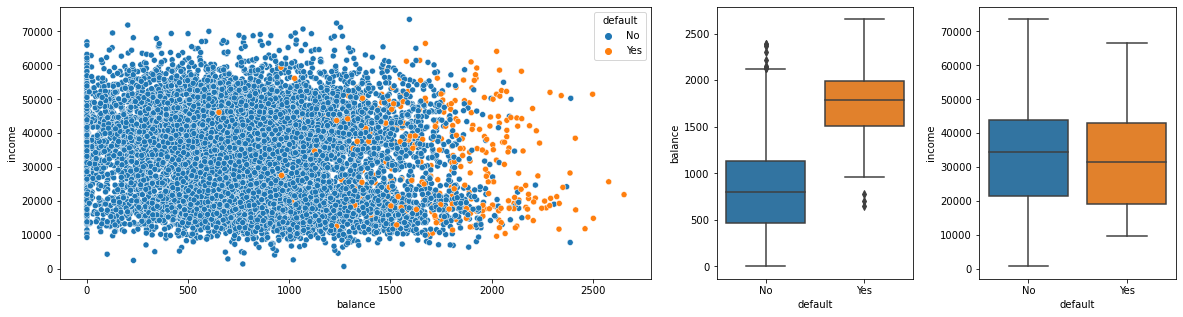

In [5]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5),gridspec_kw={'width_ratios': [3, 1,1]})
sns.scatterplot(data=defaultdata, x="balance", y="income", hue="default", ax=axs[0])
# hubungan default terhadap variabel balance
sns.boxplot(x="default", y="balance", data=defaultdata, ax=axs[1])
# hubungan default terhadap variabel income
sns.boxplot(x="default", y="income", data=defaultdata, ax=axs[2])

### Pertanyaan:
apa saja yang bisa Anda analisis dari data tersebut ? 

### Jawab:
1. Scatterplot paling kiri 
  - Terdapat data imbalance dalam dataset kita
  - Dapat kita lihat pula kalau ada beberapa pencilan atau outlier data di kedua kelas
2. Boxplot kiri (Default terhadap balance)
  - Kita dapat melihat pemisahan data dengan kelas default dan tidak dengan jelas disini
  - Ada pencilan data dalam distribusi kedua kelas
3. Boxplot kanan (Default terhadap Income)
  - Tidak ada pemisahan yang jelas pada kedua kelas

Kita coba aplikasikan logistic regression dari library scikit learn:

In [6]:
X = defaultdata[["balance","income"]].to_numpy()
#X = defaultdata[["balance"]].to_numpy()
Y = defaultdata["default2"].to_numpy()

Selanjutnya kita bisa membagi data kita menjadi data training dan testing

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

Mari kita buat model logistic regression dari data kita dan hitung akurasinya.

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predicted = clf.predict(X_test)

# clf.predict_proba(X_test)
# Hitung akurasi
clf.score(X_test, y_test)

0.9673333333333334

**Diskusi**

Akurasi yang kita dapat cukup bagus apakah kita berhasil membuat model klasifikasi data kita? adakah yang janggal dari model kita? 

---

Dengan data yang tidak berimbang, melihat nilai akurasinya saja belum cukup. Mari kita cek precision dan recallnya!

Sedikit pengingat rumus precision dan recall adalah: 

$\text { Precision }=\frac{\text { True Positive }}{\text { True Positive }+\text { False Positive }}$

$\text { Recall }=\frac{\text { True Positive }}{\text { True Positive }+\text { False Negative }}$

- Precision mengukur rate False positive terhadap True positive: metric ini berguna untuk kasus klasifikasi spam pada email, karena kita tidak ingin mengklasifikasikan email penting sebagai spam (False positive)

- Recall mengukur rate False negative terhadap True positive: berguna untuk aplikasi deteksi penyakit, karena mengklasifikasikan orang yang menderita penyakit sebagai orang yang bebas penyakit tersebut (False negative) sangat berbahaya apalagi jika penyakitnya merupakan penyakit menular.  

Kita dapat menggunakan scikit-learn untuk menghitung precision dan recall kita:

In [9]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

precision, recall, fscore, support = score(y_test, predicted)

print(classification_report(y_test, predicted, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98      2902
         Yes       0.00      0.00      0.00        98

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000



C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Dapat kita lihat nilai precission dan recall dari kelas kedua kita 0! Mengapa ?

Dari visualisasi data di atas, dapat kita lihat bahwa fitur income tidak dapat memisahkan kelas dengan baik.  

## Tugas:
Ubah input data dengan hanya menggunakan data balance dan membuang data income yang kurang informatif dan lihat hasilnya!


## Pertanyaan:

Dalam kasus ini, metric manakah yang lebih tepat untuk digunakan? precission atau recall? Berikan alasannya !

---

Kita dapat melihat peningkatan performa pada model kita, namun model kita masih memiliki performa kurang bagus pada kelas dengan jumlah data yang sedikit.

Masalah class imbalance ini sangat krusial terutama pada kasus yang berhubungan dengan kesehatan. 

Kita akan mengeksplor lebih lanjut tentang class imbalance dalam logistic regression di bawah ini ! 

---

## Konsep dan Penurunan Logistic Regression

Sebelum kita membahas intuisi dari logistic regression mari kita ingat kembali definisi dari Odds.

Odds merupakan rasio dari seberapa mungkin probabilitas suatu event $p(X)$ terjadi dibanding event lainnya. Dalam kasus binary classification, terjadinya $p(X)$ dibandingkan dengan tidak terjadinya $p(X)$.

Dengan menggunakan sifat komplemen dari probabilitas:

$$
p(X)^c = 1- p(X)
$$ 

Odds dari kasus kita dapat didefinisikan dengan:

$$
\frac{p(X)}{1-p(X)}
$$

- Odds dapat bernilai mendekati $0$ ataupun mendekati $\infty$
  
  1. Jika Odds mendekati $0$ berarti semakin kecil kemungkinan event $p(X)$ terjadi. Atau dalam kasus dataset kita berarti kemungkinan **default** (gagal bayar hutang) lebih kecil.
  2. Jika Odds mendekati $\infty$ berarti semakin besar event $p(X)$ terjadi. Atau kemungkinan **default** lebih besar. 

- Contohnya:
  1. Jika odds kita 1/4 maka rata-rata 1 dari 5 orang akan masuk kelas **default**. Karena jika $p(X)=0.2$ maka oddsnya adalah:
$$
\frac{p(X)}{1-p(X)} =  \frac{0.2}{1-0.2} = \frac{1}{4}
$$ 
  2. 9 dari 10 orang rata-rata akan masuk kelas **default** saat $p(X)=0.9$, Oddsnya adalah:
$$
\frac{p(X)}{1-p(X)} =  \frac{0.9}{1-0.9} = 9
$$ 

- Odds disebut juga sebagai nilai ekspektasi dari kejadian "sukses" per kejadian "gagal" sehingga nilainya $\geq 0$. Atau dengan kata lain domainnya berada pada $[0,\infty]$.

---




Mari kita turunkan rumus Odds dari logistic regression kita. Misalkan $t=w_{0}+w_{1} X$, maka:

$$
\begin{align}
\frac{p(X)}{1-p(X)} &= \frac{\frac{e^{t}}{1+e^{t}}}{1-\frac{e^{t}}{1+e^{t}}}\\
\frac{p(X)}{1-p(X)} &= \frac{\frac{e^{t}}{1+e^{t}}}{1-\frac{e^{t}}{1+e^{t}}}\frac{1+e^{t}}{1+e^{t}} \\
\frac{p(X)}{1-p(X)} &= \frac{e^{t}}{1+e^{t}-{e^{t}}}\\
\frac{p(X)}{1-p(X)} &= {e^{t}}\\
\frac{p(X)}{1-p(X)} &= e^{w_{0}+w_{1} X}
\end{align}
$$

Jika kita operasikan $log$ pada Odds diatas maka kita akan mendapatkan:

$$
\log \left(\frac{p(X)}{1-p(X)}\right)=w_{0}+w_{1} X
$$

Ingat lagi fungsi sigmoid kita, persamaan diatas merupakan variabel perpangkatan dari eksponensial di fungsi sigmoid tersebut!

Dari sini dapat kita interpretasikan bahwa:

> **log(Odds) dari logistic regression merupakan suatu linear model**


Apa artinya?

- Pada linear regression perubahan 1 unit dalam $X$ maka akan mengubah respon $Y$ sebesar $w_1$. Sedangkan dalam logistic regression yang berubah sebesar $w_1$ disini adalah log(Odds) nya
- Dikarenakan relasi antara $p(X)$ dan X bukanlah garis lurus, perubahan $p(X)$ terhadap peningkatan nilai $X$ akan bergantung pada nilai $X$ saat ini.
- Semakin jauh $X$ dari batas kelas maka semakin cepat $X$ mendekati nilai ekstrim $0$ atau $1$.

---

## Estimasi koefisien 

### Maximum Likelihood Estimation

Koefisien $w_0$ dan $w_1$ harus kita estimasi dengan menggunakan data training kita agar dapat digunakan untuk melakukan prediksi.



Untuk membentuk lossnya mari kita asumsikan bahwa:

$${Pr}(Y=1 \mid X)=p(x)$$
Ingat kasus kita disini adalah binary classification, maka menggunakan sifat probabilitas didapatkan:
$${Pr}(Y=0 \mid X) = 1-p(x)$$

dua persamaan diatas dapat digabungkan menjadi:
$${Pr}(Y\mid X) = p(x)^y(1-p(x))^{1-y}$$

Karena kita ingin melakukan Maximum Likelihood Estimation (MLE) dan ingat asumsi data kita i.i.d maka likelihoodnya adalah:


$$
\ell\left(w_{0}, w_{1}\right)= Pr(Y \mid X,w_{0}, w_{1})\\
\ell\left(w_{0}, w_{1}\right)=\prod_{i=1}^{n} p\left(x_{i}\right)^{y_i}\left(1-p\left(x_{i}\right)\right)^{1-y_i}
$$

Lalu untuk mengupdate parameter di step berikutnya, sebelumnya kita dapat menghitung log likelihoodnya dan menyederhanakannya dengan cara:
1. Ambil logaritma dari rumus diatas.
2. Baris 1-5: Jabarkan rumus dengan aturan log dan aturan aljabar biasa.
3. Baris 6: Gunakan definisi log(Odds) pada term kedua pada ruas kanan.
4. Baris ke 7: substitusi $P(X)$ dan sederhanakan.

$$
\begin{aligned}
\ell\left(w_{0}, w_1\right) &=\sum_{i=1}^{n} y_{i} \log p\left(x_{i}\right)+\left(1-y_{i}\right) \log (1-p\left(x_{i}\right)) \\
&=\sum_{i=1}^{n} y_{i} \log p\left(x_{i}\right)+\log (1-p\left(x_{i}\right))-y_i\log (1-p\left(x_{i}\right)) \\
&=\sum_{i=1}^{n} \log (1-p\left(x_{i}\right))+y_{i} \log p\left(x_{i}\right)-y_i\log (1-p\left(x_{i}\right)) \\
&=\sum_{i=1}^{n} \log (1-p\left(x_{i}\right))+y_{i} (\log p\left(x_{i}\right)-\log (1-p\left(x_{i}\right))) \\
&=\sum_{i=1}^{n} \log (1-p\left(x_{i}\right))+\sum_{i=1}^{n} y_{i} \log \frac{p\left(x_{i}\right)}{1-p\left(x_{i}\right)} \\
&=\sum_{i=1}^{n} \log (1-p\left(x_{i}\right))+\sum_{i=1}^{n} y_{i}\left(w_{0}+x_{i} \cdot w_1\right) \\
&=\sum_{i=1}^{n}-\log (1+e^{w_{0}+x_{i} \cdot w_1})+\sum_{i=1}^{n} y_{i}\left(w_{0}+x_{i} \cdot w_1\right)
\end{aligned}
$$

**Pertanyaan:**

Mengapa kita mengambil logaritma dari fungsi likelihood ini? apa yang kita dapat dari "log trick" ini?

**Jawab**:

Menyederhanakan rumus: pangkat menjadi turun, perkalian menjadi penjumlahan.  
tambahan:  
penggunaan log tidak mengubah posisi dari nilai optimum. Artinya jika posisi nilai y optimum di $\bar{x}$, maka $\bar{x}$ itu juga merupakan posisi nilai optimum di log(y)


### Gradient Ascent

Kemudian kita dapat melakukan turuanan parsial pada tiap koefisien dengan:
1. Gunakan chain rule dan rumus turunan log di term pertama dari ruas kanan
2. Lakukan turunan parsial biasa pada term kedua dari ruas kanan
3. Setelah itu sederhakan menggunakan definisi dari $p(X)$

Sehingga didapatkan:

$$
\begin{aligned}
\frac{\partial \ell}{\partial w_{j}} &=-\sum_{i=1}^{n} \frac{1}{1+e^{w_{0}+x_{i} \cdot w_1}} e^{w_{0}+x_{i} \cdot w_1} x_{i j}+\sum_{i=1}^{n} y_{i} x_{i j} \\
&=\sum_{i=1}^{n}\left(y_{i}-p\left(x_{i} ; w_{0}, w_1\right)\right) x_{i j}
\end{aligned}
$$

Atau dalam bentuk matriks dapat ditulis dengan:

$$
\frac{\partial \ell}{\partial \beta} = X^T(\mathbf{y}-p(\mathbf{x};w_0,w))
$$

Lalu apa yang kita lakukan setelah mendapat bentuk dari gradientnya? optimasi $w$ dengan men set gradien sama dengan $0$?

Dikarenakan kita memiliki fungsi transendental yaitu $e^{(x)}$ dalam rumus tersebut, kita tidak dapat mendapatkan solusi tertutupnya saat turunan tersebut sama dengan $0$.  Sehingga dibutuhkan metode numerik untuk melakukan estimasi koefisiennya. Kita dapat melakukan ini menggunakan gradient ascent, yaitu kebalikan dari gradient descent. 

Kita dapat melakukan gradient ascent dengan rumus berikut:

$$
w_j := w_j + \alpha * \frac{\partial \ell}{\partial w}
$$

Perlu menjadi catatan disini karena kita ingin mengestimasi maksimum dari likelihoodnya maka disini kita menggunakan tanda + 

---

### Prediksi 

Setelah Mendapatkan nilai nilai koefisiennya, kita dapat melakukan prediksi pada data baru dengan cara:

$
\hat{p}(X)=\frac{e^{\hat{w}_{0}+\hat{w}_{1} X}}{1+e^{\hat{w}_{0}+\hat{w}_{1} X}}
$

## Logistic regression from scratch

Mari kita tuliskan logistic regression model kita menggunakan lambda function pada python:

Pertama dapat kita tuliskan Linear equationnya disini kita hanya menggunakan $X$. $w$ bisa ditambahkan dengan cara menambahkan fitur baru dalam data kita dengan nilai 1:

In [10]:
linear_eq = lambda X, w: np.dot(X, w)

Kemudian tuliskan fungsi sigmoid kita, dimana inputnya adalah hasil dari linear equation diatas:

In [11]:
sigmoid = lambda z : 1/ (1 + np.exp(-z))

Untuk melihat progress training kita kita dapat juga mendefinisikan fungsi log likelihood kita:

$$
\sum_{i=1}^{n}y_{i}\left(w_{0}+x_{i} \cdot w\right)-\log 1+e^{w_{0}+x_{i} \cdot w}
$$

In [12]:
def log_likelihood(X, y, w):
    z = linear_eq(X,w)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

Untuk estimasi nilai koefisien dari model logistic regression kita, gunakan gradien yang telah kita turunkan seperti di bagian sebelumnya. Selanjutnya gradien ini akan digunakan untuk update koefisien pada algoritm gradient ascent yang akan kita implementasikan bersama dengan fungsi training kita.

$$
\frac{\partial \ell}{\partial w} = X^T(\mathbf{y}-p(\mathbf{x};w_0,w))
$$

In [13]:
gradient = lambda X, y, yhat: np.dot(X.T, (y-yhat))

Terakhir kita akan menuliskan fungsi training kita, yang outputnya adalah nilai koefisien kita setelah selesai training. 
- Kita akan mengimplementasikan agoritma gradient ascent karena kita akan mencari maksimum dari log likelihood dengan mengupdate koefisien kita.
- Di dalam fungsi ini kita akan menambahkan intercept pada model kita dengan cara memasukan fitur baru dengan nilai 1 pada data kita.
- Kita juga akan melakukan pengecekan terhadap nilai log likelihood kita agar kita dapat melihat progress dari training kita

In [14]:
def logistic_regression(X, y, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
    w = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        z = linear_eq(X, w)
        yhat = sigmoid(z) #prediction

        # Gradient ascent
        w += learning_rate * gradient(X, y, yhat)
        
        # Print log-likelihood for tracking the training
        if step % 5000 == 0:
            print (log_likelihood(X, y, w))
        
    return w

Disini kita akan menggunakan data default seperti sebelumnya. kita dapat membagi data kita kedalam data training dan testing menggukana scikit-learn seperti sebelumnya:

In [15]:
from sklearn.model_selection import train_test_split

default_train, default_test = train_test_split(defaultdata, test_size=0.2, random_state=1994)

Sekarang mari kita jalankan proses trainingnya, namun sebelumnya kita lakukan scaling dulu pada data kita agar proses trainingnya lebih stabil. 

Scaling akan memastikan bahwa semua fitur berada pada range yang sama hal ini akan membuat kontur dari loss functionnya lebih berimbang (less skewed), sehingga gradient ascentnya akan lebih cepat konvergen. 

Untuk melakukan scaling kita dapat menggunakan scikit-learn MinMaxScaler():



In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = default_train[["balance"]].to_numpy()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
Y_train = default_train["default2"].to_numpy()

w_hat = logistic_regression(X_train, Y_train,
                     num_steps = 50000, learning_rate = 1e-5, add_intercept=True)

print("Koefisien:",w_hat)

-5395.281775568049
-949.8125839401625
-820.9755691987374
-757.8001993027584
-723.049022602751
-702.1455950911212
-688.7252636716998
-679.6870327361482
-673.377135250297
-668.8481414537879
Koefisien: [-8.60491428 11.1419907 ]


Kemudian kita dapat menulis kode untuk melakukan prediksi, untuk diperhatikan disini kita perlu menambahkan fitur dengan nilai 1 pada data kita untuk dikalikan dengan koefisien $w_0$. Kemudian probabilitas untuk kelas 1 dapat di hitung dengan:

In [17]:
def logreg_class_prob(X, w_hat, add_intercept=False):
  intercept = np.ones((X.shape[0], 1))
  X = np.hstack((intercept, X))
  z = np.dot(X, w_hat)
  return sigmoid(z)

Prediksinya dapat ditentukan dengan cara merakukan rounding dari probabilitas yang didapat pada fungsi diatas dengan memodifikasinya dengan:

In [18]:
def logreg_prediction(X, w_hat, add_intercept=False):
  intercept = np.ones((X.shape[0], 1))
  X = np.hstack((intercept, X))
  final_scores = np.dot(X, w_hat)
  return np.round(sigmoid(final_scores))

note: np.hstack akan menumpuk array berurutan secara horizontal 

Mengapa melakukan rounding dapat memberikan kita prediksinya?

Kemudian bisa kita ujikan model hasil training kita pada data testing yang kita punya.

In [19]:
X_test = default_test[["balance"]].to_numpy()
Y_test = default_test["default2"].to_numpy()
X_test = scaler.transform(X_test)

preds = logreg_prediction(X_test,w_hat, add_intercept=True)

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

print(classification_report(Y_test, preds, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       0.97      1.00      0.98      1929
         Yes       0.80      0.23      0.35        71

    accuracy                           0.97      2000
   macro avg       0.89      0.61      0.67      2000
weighted avg       0.97      0.97      0.96      2000



### Perbandingan performa dengan menggunakan library scikit-learn

Mari kita bandingkan dengan hasil menggunakan scikit-learn:

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
predicted = clf.predict(X_test)

print(classification_report(Y_test, predicted, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98      1929
         Yes       0.83      0.21      0.34        71

    accuracy                           0.97      2000
   macro avg       0.90      0.60      0.66      2000
weighted avg       0.97      0.97      0.96      2000



Dapat kita lihat hasil dari implementasi kita tidak jauh performanya diabandingkan dengan menggunakan scikit-learn.  

Mari kita cek hasil koefisien model kita dan koefisien logistic regression menggunakan scikit-learn:

In [21]:
print("Koefisien model kita", w_hat)
print("Koefisien scikit learn", clf.intercept_, clf.coef_)

Koefisien model kita [-8.60491428 11.1419907 ]
Koefisien scikit learn [-8.34613101] [[10.66015051]]


Koefisien $w_0$ dan $w_1$ tidak jauh beda! 

Kita sedikit beruntung disini karena dalam implementasinya scikit learn menerapkan regularisasi $L2$ dalam solver defaultnya.

---
# Mengatasi class imbalance 

Kita dapat mengatasi class imbalance diatas dengan cara memberikan weight pada kelas yang ada di dalam logistic regression. kita dapat mengubah log likelihood kita sehingga gradien kita menjadi: 

$$
\frac{\partial \ell}{\partial w} = X^T(\mathbf{w}(\mathbf{y}-p(\mathbf{x};w_0,w)))
$$

In [22]:
def gradient (X, y, yhat, wclass): 
  return (np.dot(X.T, (wclass[0]**(1-y)*wclass[1]**y)*(y-yhat)))

---

### Menentukan class weight

Bagaimana cara menentukan class weight? 

Ada tiga cara menentukan class weight kita:
1. Pengetahuan expert
2. Hyperparameter optimization
3. Heuristik

disini kita akan menggunakan heuristic yang digunakan dalam library [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) yaitu dengan rumus:

$$
w_j = N/(2*N_j) 
$$

dengan $w_j$ adalah weight untuk kelas $j$, $N$ adalah jumlah total data training kita, dan $N_j$ adalah jumlah total data yang berlabelkan $j$.

Mari kita hitung weight untuk kedua kelas kita:

In [32]:
total_n = len(default_train["default2"])
majority_class = len(default_train[default_train["default2"]==0])
minority_class = len(default_train[default_train["default2"]==1])

w1 = total_n/(2*majority_class)
w2 = total_n/(2*minority_class)

wclass = [w1,w2]
print(wclass)

[0.5169294391315585, 15.267175572519085]


### Perbandingan dengan scikit-learn
Dengan menggunakan gradien baru kita kita dapat menuliskan lagi fungsi gradient ascent kita sebagai berikut:  
Kita gunakan simbol $\beta$ untuk menggantikan w, untuk membedakannya dengan class weight

In [24]:
def logistic_regression(X, y, num_steps, learning_rate, add_intercept = False, wclass=[1,1]):
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
    Beta = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        scores = linear_eq(X, Beta)
        yhat = sigmoid(scores) #prediction

        # Gradient ascent
        Beta += learning_rate * gradient(X, y, yhat, wclass)
        # Print log-likelihood for tracking the training
        if step % 5000 == 0:
            print (log_likelihood(X, y, Beta))
        
    return Beta


Sekarang kita jalankan ulang logistic regression training kita dengan menggunakan class weight yang kita hitung tadi:

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = default_train[["balance"]].to_numpy()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
Y_train = default_train["default2"].to_numpy()

Betahat = logistic_regression(X_train, Y_train,
                     num_steps = 50000, learning_rate = 1e-5, add_intercept=True, wclass=wclass)


-5552.8026857607165
-2751.7531858074813
-2593.149296929966
-2553.314856977518
-2539.288782267643
-2533.472426234775
-2530.791800029983
-2529.453428260185
-2528.7399578676077
-2528.3382737566744


Kita lihat performa dari weighted logistic regression kita:

In [26]:
X_test = default_test[["balance"]].to_numpy()
Y_test = default_test["default2"].to_numpy()
X_test = scaler.transform(X_test)

preds = logreg_prediction(X_test,Betahat, add_intercept=True)

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       1.00      0.86      0.92      1929
         Yes       0.20      0.94      0.33        71

    accuracy                           0.86      2000
   macro avg       0.60      0.90      0.63      2000
weighted avg       0.97      0.86      0.90      2000



Kita cek apakah implementasi kita sudah benar dengan membandingkannya dengan logistic regression dengan scikit-learn. Jangan lupa gunakan class weight yang sama dengan men set class_weight dengan weight yang sudah kita hitung tadi!

In [27]:
from sklearn.linear_model import LogisticRegression

we = {0:w1, 1:w2}
clf = LogisticRegression(random_state=0,class_weight=we).fit(X_train, Y_train)
predicted = clf.predict(X_test)
print(classification_report(Y_test, predicted, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       1.00      0.86      0.92      1929
         Yes       0.20      0.94      0.33        71

    accuracy                           0.86      2000
   macro avg       0.60      0.90      0.63      2000
weighted avg       0.97      0.86      0.90      2000



Kita lihat performanya hampir sama! (mungkin ada sedikit perbedaan karena solver yang kita gunakan)

Namun kenapa hasilnya lebih jelek dibanding tanpa class weight? 

---

### Koreksi bias/intercept untuk kasus yang diseimbangkan

Sekarang mari kita pakai konsep Bayesian kita. Jika kita hubungkan dengan Bayes rule, logistic regression bisa diinterpretasikan sebagai berikut:

$$
\begin{aligned}
p\left(\text{True} \mid x\right) &=\frac{p\left(x \mid \text{True}\right) p\left(\text{True}\right)}{p(x)} \\
&=\frac{p\left(x \mid \text{True}\right) p\left(\text{True}\right)}{p\left(x \mid \text{True}\right) p\left(\text{True}\right)+p\left(x \mid \text{False}\right) p\left(\text{False}\right)} \\
&=\frac{1}{1+\frac{p\left(x \mid \text{False}\right) p\left(\text{False}\right)}{p\left(x \mid \text{True}\right) p\left(\text{True}\right)}} \\
&=\frac{1}{1+\exp \left(\ln \frac{p\left(x \mid \text{False}\right) p\left(\text{False}\right)}{p\left(x \mid \text{True}\right) p\left(\text{True}\right)}\right)} \\
&=\frac{1}{1+\exp \left(-\ln \frac{p\left(x \mid \text{True}\right) p\left(\text{True}\right)}{p\left(x \mid \text{False}\right) p\left(\text{False}\right)}\right)} \\
&=\frac{1}{1+e^{-(\beta_{0}+\beta X)}}
\end{aligned}
$$



Dari rumus diatas kita dapat menjabarkan linear model kita sebagai berikut:
$$
\beta_{0}+\beta X=\ln \frac{p\left(x \mid \text{True}\right) p\left(\text{True}\right)}{p\left(x \mid \text{False}\right) p\left(\text{False}\right)}=\ln \frac{p\left(x \mid \text{True}\right)}{p\left(x \mid \text{False}\right)}+\ln \frac{p\left(\text{True}\right)}{p\left(\text{False}\right)}
$$

Karena dalam training kita menyeimbangkan kelas kita menggunakan weight maka $p(\text{True})=p(\text{False})$. Sehingga prior log odds kita menjadi 0. Lalu kita mendapatkan:
$$
\beta_{0}+\beta X=\ln \frac{p\left(x \mid \text{True}\right)}{p\left(x \mid \text{False}\right)}
$$

Artinya kita melakukan estimasi dengan asumsi bahwa prior kelas kita seimbang. Kita dapat memasukan prior log odds kita kembali dengan cara:
$$
\begin{aligned}
\beta_{0}+\beta X+\ln \frac{p\left(\text{True}\right)}{p\left(\text{False}\right)} &=\ln \frac{p\left(x \mid \text{True}\right)}{p\left(x \mid \text{False}\right)}+\ln \frac{p\left(\text{True}\right)}{p\left(\text{False}\right)} \\
\beta_{0}^{\prime}+\beta X &=\ln \frac{p\left(x \mid \text{True}\right)}{p\left(x \mid \text{False}\right)}+\ln \frac{p\left(\text{True}\right)}{p\left(\text{False}\right)},
\end{aligned}
$$

Disini kita definisikan $\beta_{0}^{\prime}$ sebagai:

$$
\beta_0^{\prime}=\beta_0+\ln \frac{p\left(\text{True}\right)}{p\left(\text{False}\right)}
$$



Sehingga kita dapat melakukan koreksi pada $\beta_0$ untuk testing dengan:

In [28]:
import copy
Betahat_corrected = copy.deepcopy(Betahat)
Betahat_corrected[0]= Betahat[0]+np.log(w1/w2)

print("Betahat",Betahat)
print("Betahat_corrected", Betahat_corrected)

Betahat [-7.02373327 14.19565273]
Betahat_corrected [-10.4092873   14.19565273]


Mari kita lihat performa model kita:

In [29]:
X_test = default_test[["balance"]].to_numpy()
Y_test = default_test["default2"].to_numpy()
X_test = scaler.transform(X_test)

preds = logreg_prediction(X_test,Betahat_corrected, add_intercept=True)

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

print(classification_report(Y_test, preds, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       0.98      1.00      0.99      1929
         Yes       0.87      0.37      0.51        71

    accuracy                           0.98      2000
   macro avg       0.92      0.68      0.75      2000
weighted avg       0.97      0.98      0.97      2000



Bandingkan performa model kita dengan model tanpa class weighting dan bias term correction.

**Diskusi**

Terdapat peningkatan sedikit dalam model kita setelah bias corretion yang kita lakukan namun tidak terlalu signifikan. Mengapa?

1. Apakah data kita linear?
2. Apakah logistik regression cocok digunakan untuk data kita? kalau tidak mengapa? model seperti apa yang lebih cocok dengan data kita?


Kita bisa cek apa yang dilakukan oleh bias correction term dengan memvisualisasikan garis fungsi logistik kita:

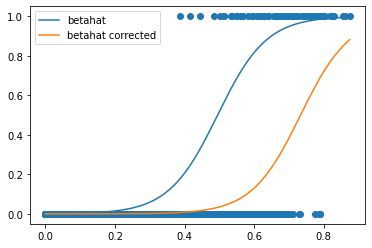

In [30]:
prob_betahat = logreg_class_prob(X_test,Betahat, add_intercept=True)
idx_prob_betahat = np.argsort(prob_betahat)
prob_betahat_c = logreg_class_prob(X_test,Betahat_corrected, add_intercept=True)
idx_prob_betahat_c = np.argsort(prob_betahat_c)

plt.scatter(X_test,Y_test)
plt.plot(X_test[idx_prob_betahat], prob_betahat[idx_prob_betahat],label="betahat")
plt.plot(X_test[idx_prob_betahat_c], prob_betahat_c[idx_prob_betahat],label="betahat corrected")
plt.legend()

Garisnya akan berubah menyesuaikan dengan rasio jumlah datanya! 

(dapat dikatan disini kita mengkoreksi model kita dengan informasi prior)

# Tugas

1. Gunakan dataset iris
2. Bagi dataset iris menjadi data latih dan data uji dengan rasio 80:20, random_state=0
3. Bandingkan performa hasil prediksi data uji, antara library scikit learn dan from the scratch

In [31]:
#Isilah jawaban tugas dibawah ini

# Laporan Akhir

- Cari dataset lain. Lakukan pre-processing data jika diperlukan.
- Tuliskan sumber dataset yang anda pakai disini
- Jelaskan secara singkat mengenai isi dari dataset tersebut
- Hitung performance dari hasil prediksi. Gunakan metrik yang sesuai.
- Tulis kesimpulan

Note : Mohon untuk memberikan keterangan dari setiap kolom kode yang dijalankan pada file .ipynb
